<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practiced them yet). In this lesson we'll discuss a fundamental method for avoiding overfitting that is commonly referred to as _train/test split_ validation. 

The idea is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [3]:
import matplotlib.pyplot as plt

% matplotlib inline

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [5]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
X.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False], dtype=bool)

In [8]:
X.index

RangeIndex(start=0, stop=506, step=1)

In [9]:
X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [10]:
X.shape

(506, 13)

In [11]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [12]:
X.apply(pd.Series.nunique)

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
linreg = LinearRegression()

In [15]:
import seaborn as sns

In [16]:
X1 = X[['CRIM', 'INDUS', 'CHAS', 'RAD']]
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])
linreg.fit(X1, y)
linreg_pred = linreg.predict(X1)
print(linreg.intercept_)
print(linreg.coef_)

[ 29.02540168]
[[-0.21797284 -0.54465585  6.86097434 -0.01236881]]


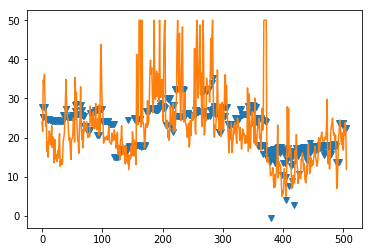

In [17]:
plt.plot(linreg_pred, 'v')
plt.plot(y)

In [18]:
#This model has underfit

In [19]:
X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)

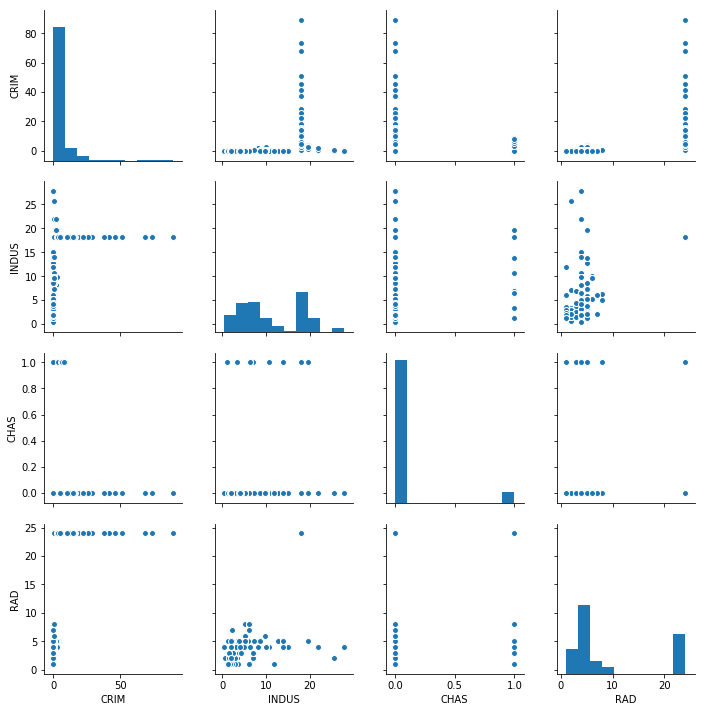

In [20]:
sns.pairplot(X1)

In [21]:
#BAD FEATURE SELECTION!!

In [22]:
boston = pd.concat([X, y], axis = 1)
#reload boston data set to identify relationships between features and MEDV

In [23]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


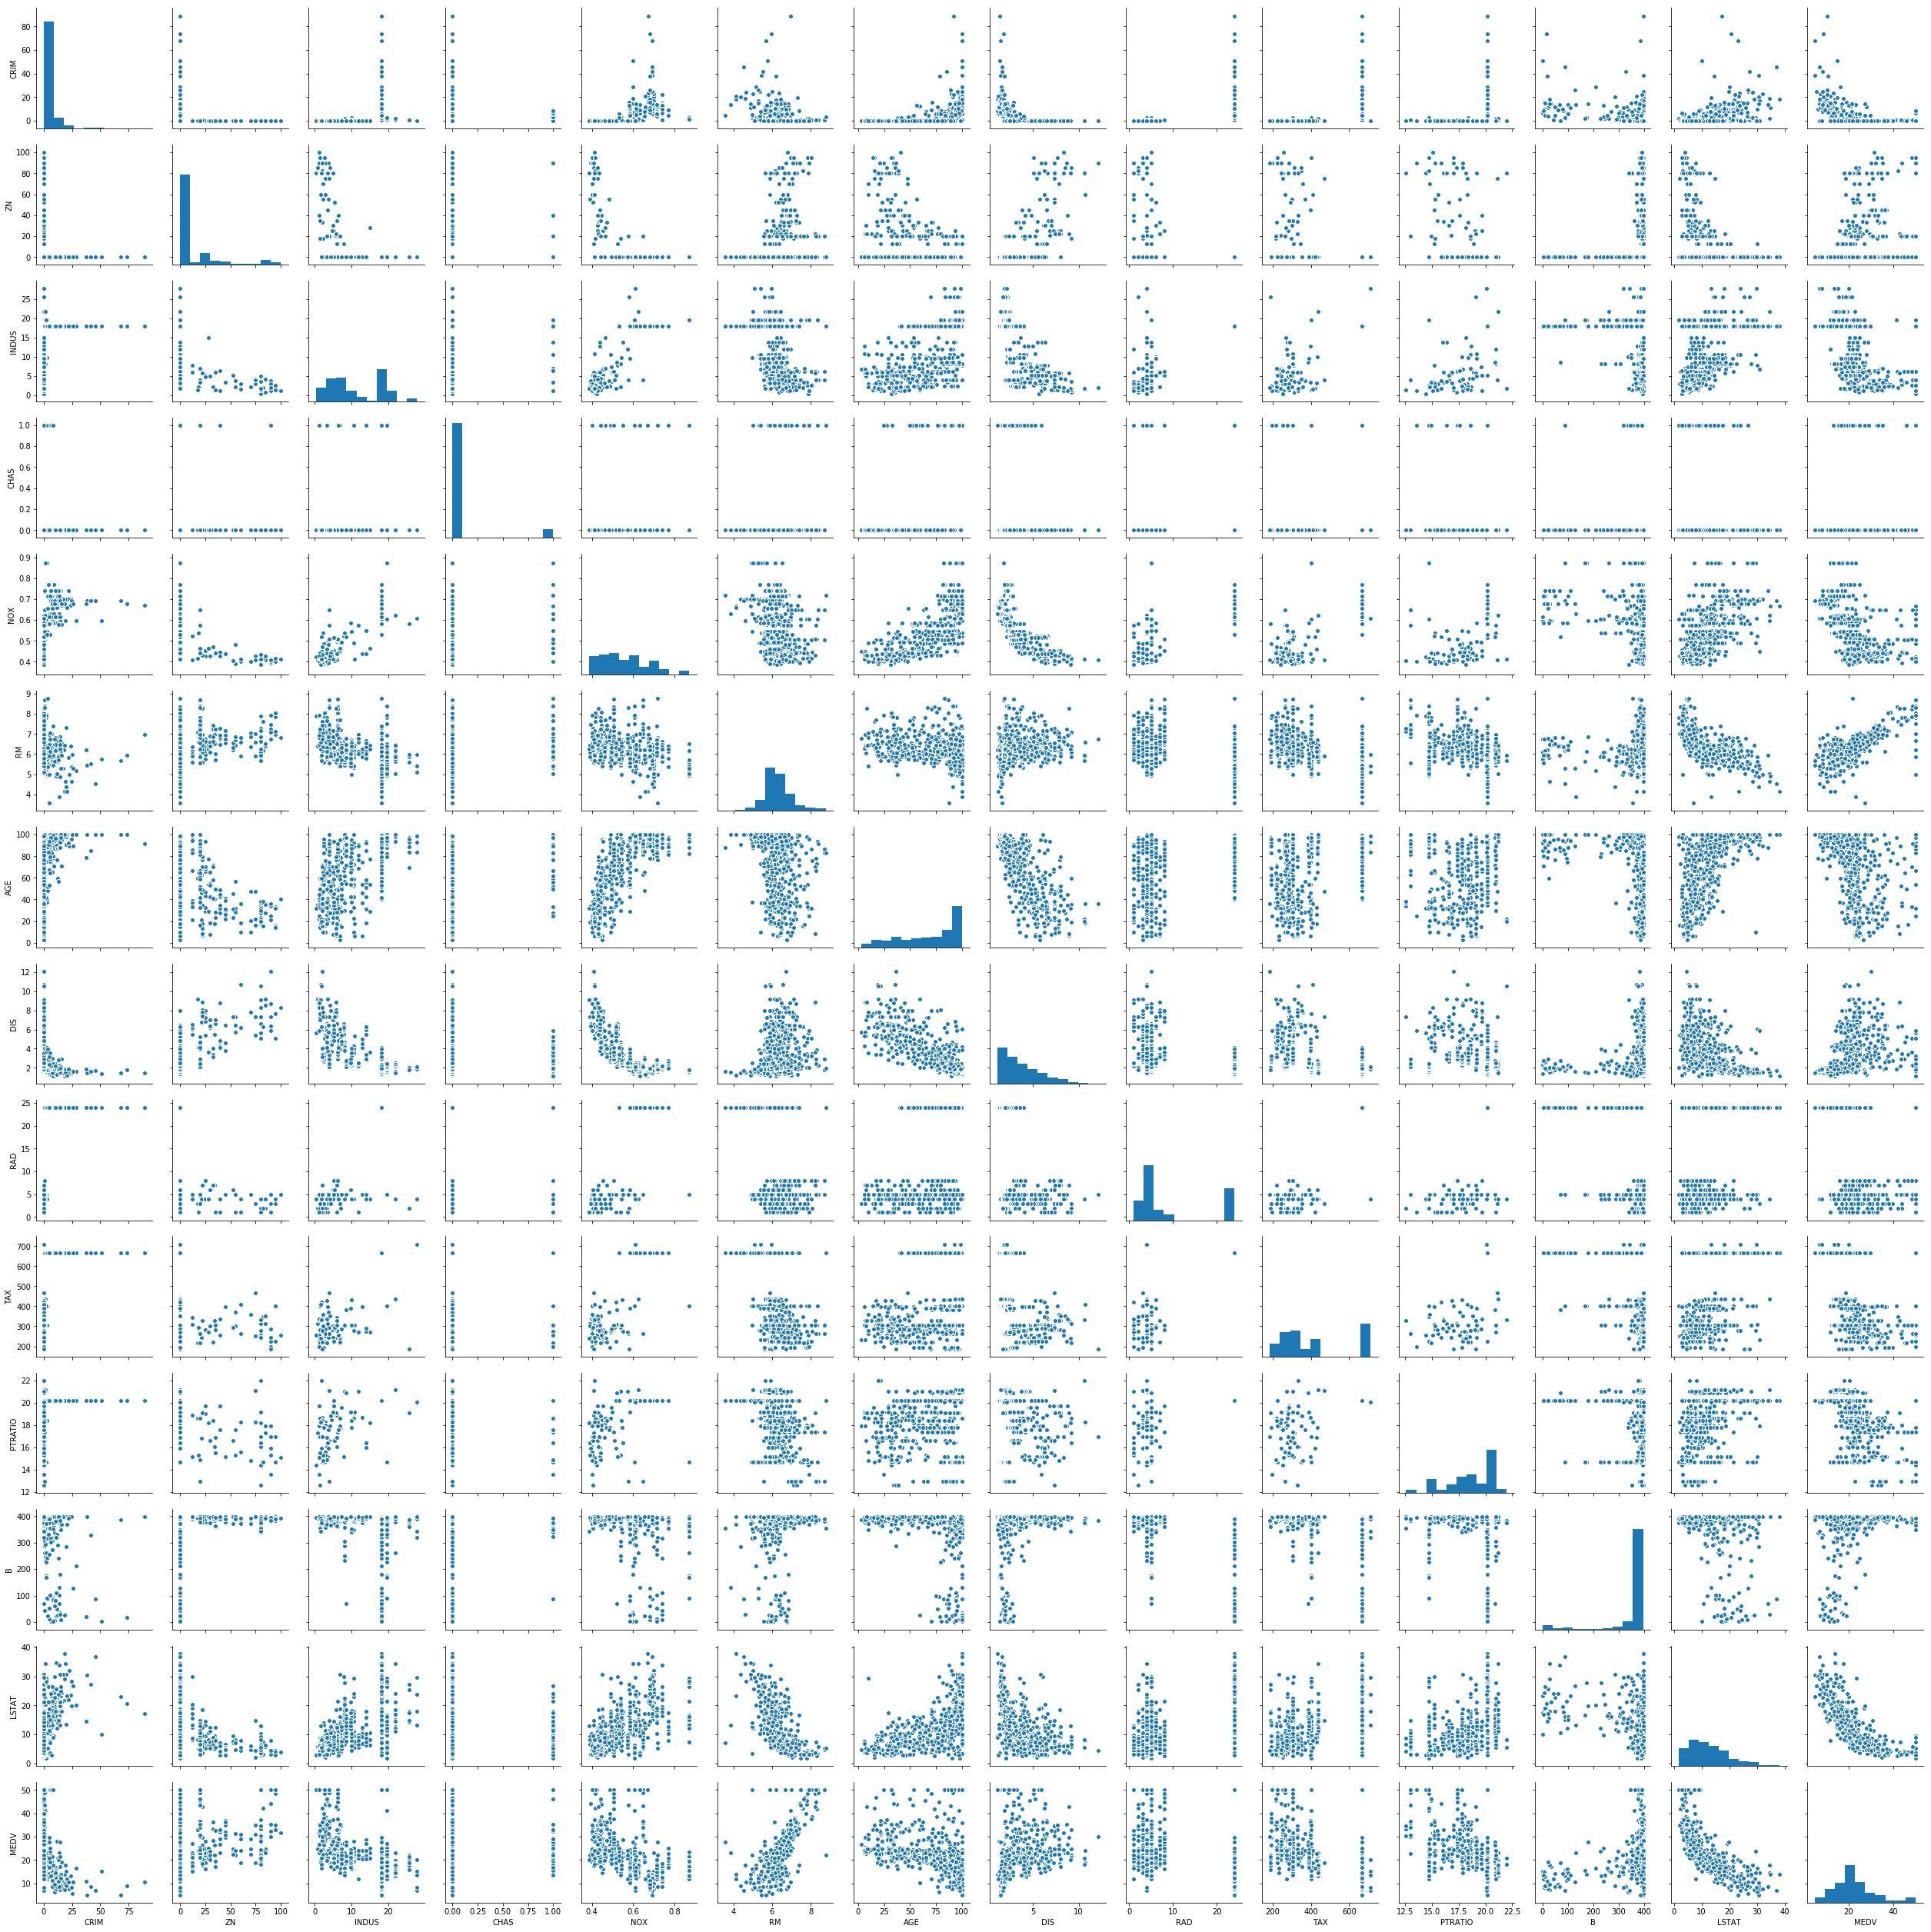

In [24]:
sns.pairplot(boston)
#see relationships of features to MEDV

In [25]:
#try new features
X2 = boston[['LSTAT', 'RM', 'ZN']]
y = boston['MEDV']

linreg.fit(X2, y)
linreg_pred = linreg.predict(X2)
print(linreg.intercept_)
print(linreg.coef_)

-1.46057734055
[-0.62401045  5.04554308  0.01580778]


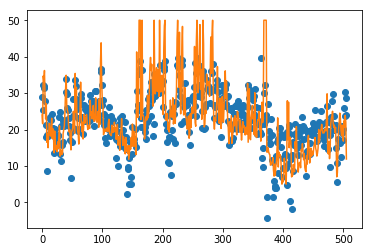

In [26]:
plt.plot(linreg_pred, 'o')
plt.plot(y)

In [27]:
#much better, but potential overfit? Now will check MSE between target and pred

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
mean_squared_error(y, linreg_pred)

30.400697555435304

### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X2,y, test_size = 0.3)

In [32]:
linreg_pred = linreg.predict(X_train)

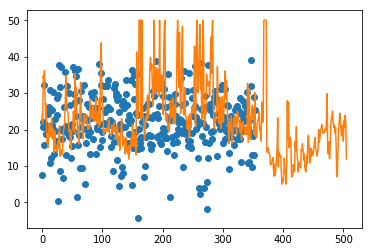

In [33]:
plt.plot(linreg_pred, 'o')
plt.plot(y)

In [34]:
#worse! because the test data was the top 30% of y values, skewing results to bottom 70%

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X2,y, test_size = 0.1)

In [36]:
linreg_pred = linreg.predict(X_train)

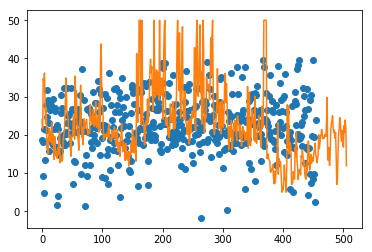

In [37]:
plt.plot(linreg_pred, 'o')
plt.plot(y)

In [38]:
#a little better, but not by much; again the 10% test split was the top 10% of y values, skewing results.

### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
cross_val_score(linreg, X2, y, cv=5)

array([ 0.66508137,  0.68222204,  0.40652669,  0.17670129, -0.36905206])

In [41]:
 cross_val_score(linreg, X2, y, cv=10)   

array([ 0.67638208,  0.62993217, -1.44626711,  0.49741898,  0.57498721,
        0.48326549, -0.21519658,  0.05081886, -1.7416062 ,  0.24000205])

In [42]:
cross_val_score(linreg, X2, y, cv=15)

array([ 0.64766304,  0.681748  ,  0.68023448, -1.0316566 ,  0.66778911,
        0.39931633,  0.51881405,  0.60448041,  0.62809017, -0.14375287,
       -0.30256437, -3.03326506, -1.03062483, -1.03687283,  0.35037754])

In [43]:
cross_val_score(linreg, X2, y, cv=3)

array([ 0.64418918,  0.24648095, -0.43587774])

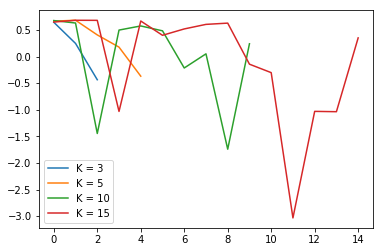

In [44]:
plt.plot(cross_val_score(linreg, X2, y, cv=3), label='K = 3')
plt.plot(cross_val_score(linreg, X2, y, cv=5), label='K = 5')
plt.plot(cross_val_score(linreg, X2, y, cv=10), label='K = 10')
plt.plot(cross_val_score(linreg, X2, y, cv=15), label='K = 15')
plt.legend()

In [45]:
#K=5 appears to be the optimal folds due to relatively more stable results from each train/test group
#After K=5, folds get more sparse and extreme likely due to lack of diversity within folds
#In any case, even with K=5, variance is a bit wide meaning model has overfit and is not good

# KNN Practice

In [46]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [47]:
# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [49]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'
iris['species_num'] = iris.species.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES

# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES


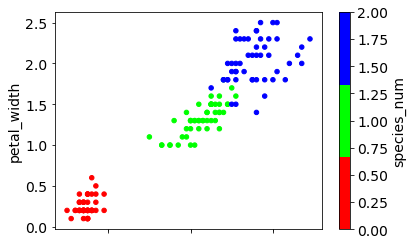

In [50]:
iris.plot(kind='scatter', x ='petal_length', y ='petal_width', c ='species_num', colormap=cmap_bold)

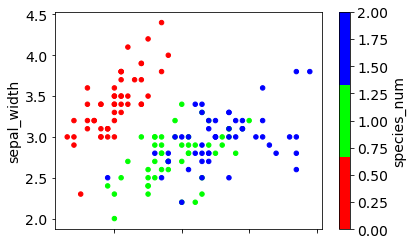

In [51]:
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap=cmap_bold)

## KNN Classification of the Iris Dataset

### Create your feature matrix "X"
This will be all species measurements (sepal length, petal width, etc...)

In [52]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

### Create your target vector "y"
This will be the species type.

In [53]:
y = iris['species_num']

### Make Use of Train-Test-Split
Split your data in to train and test sets.

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Import KNN From `scikit-learn` and Instatiate a Model With One Neighbor

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=1)

In [57]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Check the Accuracy
Train your model using the training set then use the test set to determine the accuracy

In [58]:
from sklearn import metrics

In [59]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.921052631579


### Create a Model With Five Neighbors. Did it Improve?

In [60]:
knn5 = KNeighborsClassifier(n_neighbors = 5)

In [61]:
knn5.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [62]:
y_pred2_class = knn5.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred2_class)))

0.921052631579


In [63]:
#YES! it did!

### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

In [64]:
for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    metrics.accuracy_score(y_test, y_pred_class)
    print("The accuracy score for KNN N={} is {}".format(i, metrics.accuracy_score(y_test, y_pred_class)))

The accuracy score for KNN N=1 is 0.9210526315789473
The accuracy score for KNN N=2 is 0.9210526315789473
The accuracy score for KNN N=3 is 0.8947368421052632
The accuracy score for KNN N=4 is 0.9210526315789473
The accuracy score for KNN N=5 is 0.9210526315789473
The accuracy score for KNN N=6 is 0.9210526315789473
The accuracy score for KNN N=7 is 0.9210526315789473
The accuracy score for KNN N=8 is 0.9473684210526315
The accuracy score for KNN N=9 is 0.9210526315789473
The accuracy score for KNN N=10 is 0.9473684210526315
The accuracy score for KNN N=11 is 0.9473684210526315
The accuracy score for KNN N=12 is 0.9210526315789473
The accuracy score for KNN N=13 is 0.9210526315789473
The accuracy score for KNN N=14 is 0.9210526315789473
The accuracy score for KNN N=15 is 0.9210526315789473
The accuracy score for KNN N=16 is 0.9210526315789473
The accuracy score for KNN N=17 is 0.9210526315789473
The accuracy score for KNN N=18 is 0.9210526315789473
The accuracy score for KNN N=19 is 0.

In [65]:
#Result: K=10 is the best with 97.37% accuracy score!!

### Bonus: According to `scikit-learn` Documentation, What is `knn.predict_proba(X_new)` Going to Do?

In [66]:
#If there is a new value, it will take the highest probability classification by the majority class based on volume
#of given neighbors, if X_new contains matching values to previous test data, it will match the result

## Enrichment
_Everything beyond this point is enrichment and examples using Statsmodels for linear regression._

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [68]:
# First, format our data in a DataFrame
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [69]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Thu, 17 Jan 2019   Prob (F-statistic):          1.59e-321
Time:                        11:57:28   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
model = smf.ols(formula=formulas['case2'], data=df)
result = model.fit()

result.summary()
#Results: way worse!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     289.9
Date:                Thu, 17 Jan 2019   Prob (F-statistic):           1.83e-84
Time:                        12:04:51   Log-Likelihood:                -1646.3
No. Observations:                 506   AIC:                             3299.
Df Residuals:                     503   BIC:                             3311.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.2059      3.339     -5.452      0.000     -24.767     -11.645
NOX          -18.9706      2.530     -7.497      0.000     -23.942     -13.999
RM             8.1567      0.417     19.546      0.000       7.337       8.977
==============================================================================
Omnibus:                      191.473   Durbin-Watson:                   0.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1191.455
Skew:                           1.518   Prob(JB):                    1.90e-259
Kurtosis:                       9.877   Cond. No.                         88.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
model = smf.ols(formula=formulas['case3'], data=df)
result = model.fit()

result.summary()
#Results: even worse!!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     75.66
Date:                Thu, 17 Jan 2019   Prob (F-statistic):           1.88e-29
Time:                        12:04:58   Log-Likelihood:                -1773.7
No. Observations:                 506   AIC:                             3553.
Df Residuals:                     503   BIC:                             3566.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.6359      1.347     26.465      0.000      32.990      38.281
RAD            0.2762      0.100      2.770      0.006       0.080       0.472
TAX           -0.0386      0.005     -7.485      0.000      -0.049      -0.028
==============================================================================
Omnibus:                      170.143   Durbin-Watson:                   0.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              486.175
Skew:                           1.637   Prob(JB):                    2.68e-106
Kurtosis:                       6.513   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

In [77]:
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX",
    "case4": "MEDV ~ RM + TAX + CRIM + ZN -1",
    "case5": "MEDV ~ RM + TAX + RAD + CRIM + ZN -1"
}

model = smf.ols(formula=formulas['case4'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1754.
Date:                Thu, 17 Jan 2019   Prob (F-statistic):          2.12e-293
Time:                        12:06:49   Log-Likelihood:                -1648.3
No. Observations:                 506   AIC:                             3305.
Df Residuals:                     502   BIC:                             3321.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.7043      0.130     36.221      0.000       4.449       4.959
TAX           -0.0170      0.002     -8.757      0.000      -0.021      -0.013
CRIM          -0.1189      0.040     -2.963      0.003      -0.198      -0.040
ZN             0.0466      0.013      3.583      0.000       0.021       0.072
==============================================================================
Omnibus:                      260.832   Durbin-Watson:                   0.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1758.676
Skew:                           2.185   Prob(JB):                         0.00
Kurtosis:                      11.019   Cond. No.                         206.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
model = smf.ols(formula=formulas['case5'], data=df)
result = model.fit()

result.summary()
#RESULTS: getting pretty close.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     1471.
Date:                Thu, 17 Jan 2019   Prob (F-statistic):          9.90e-297
Time:                        12:07:01   Log-Likelihood:                -1636.7
No. Observations:                 506   AIC:                             3283.
Df Residuals:                     501   BIC:                             3305.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             5.0844      0.149     34.049      0.000       4.791       5.378
TAX           -0.0311      0.003     -8.960      0.000      -0.038      -0.024
RAD            0.3630      0.075      4.846      0.000       0.216       0.510
CRIM          -0.1769      0.041     -4.311      0.000      -0.258      -0.096
ZN             0.0501      0.013      3.932      0.000       0.025       0.075
==============================================================================
Omnibus:                      247.721   Durbin-Watson:                   0.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1618.868
Skew:                           2.059   Prob(JB):                         0.00
Kurtosis:                      10.734   Cond. No.                         250.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(boston['RM', 'TAX', 'RAD', 'CRIM', 'ZN'], y)

KeyError: ('RM', 'TAX', 'RAD', 'CRIM', 'ZN')

In [103]:
from sklearn.model_selection import cross_val_score

In [106]:
cross_val_score(model.fit(), boston['RM', 'TAX', 'RAD', 'CRIM', 'ZN'], y)

KeyError: ('RM', 'TAX', 'RAD', 'CRIM', 'ZN')

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

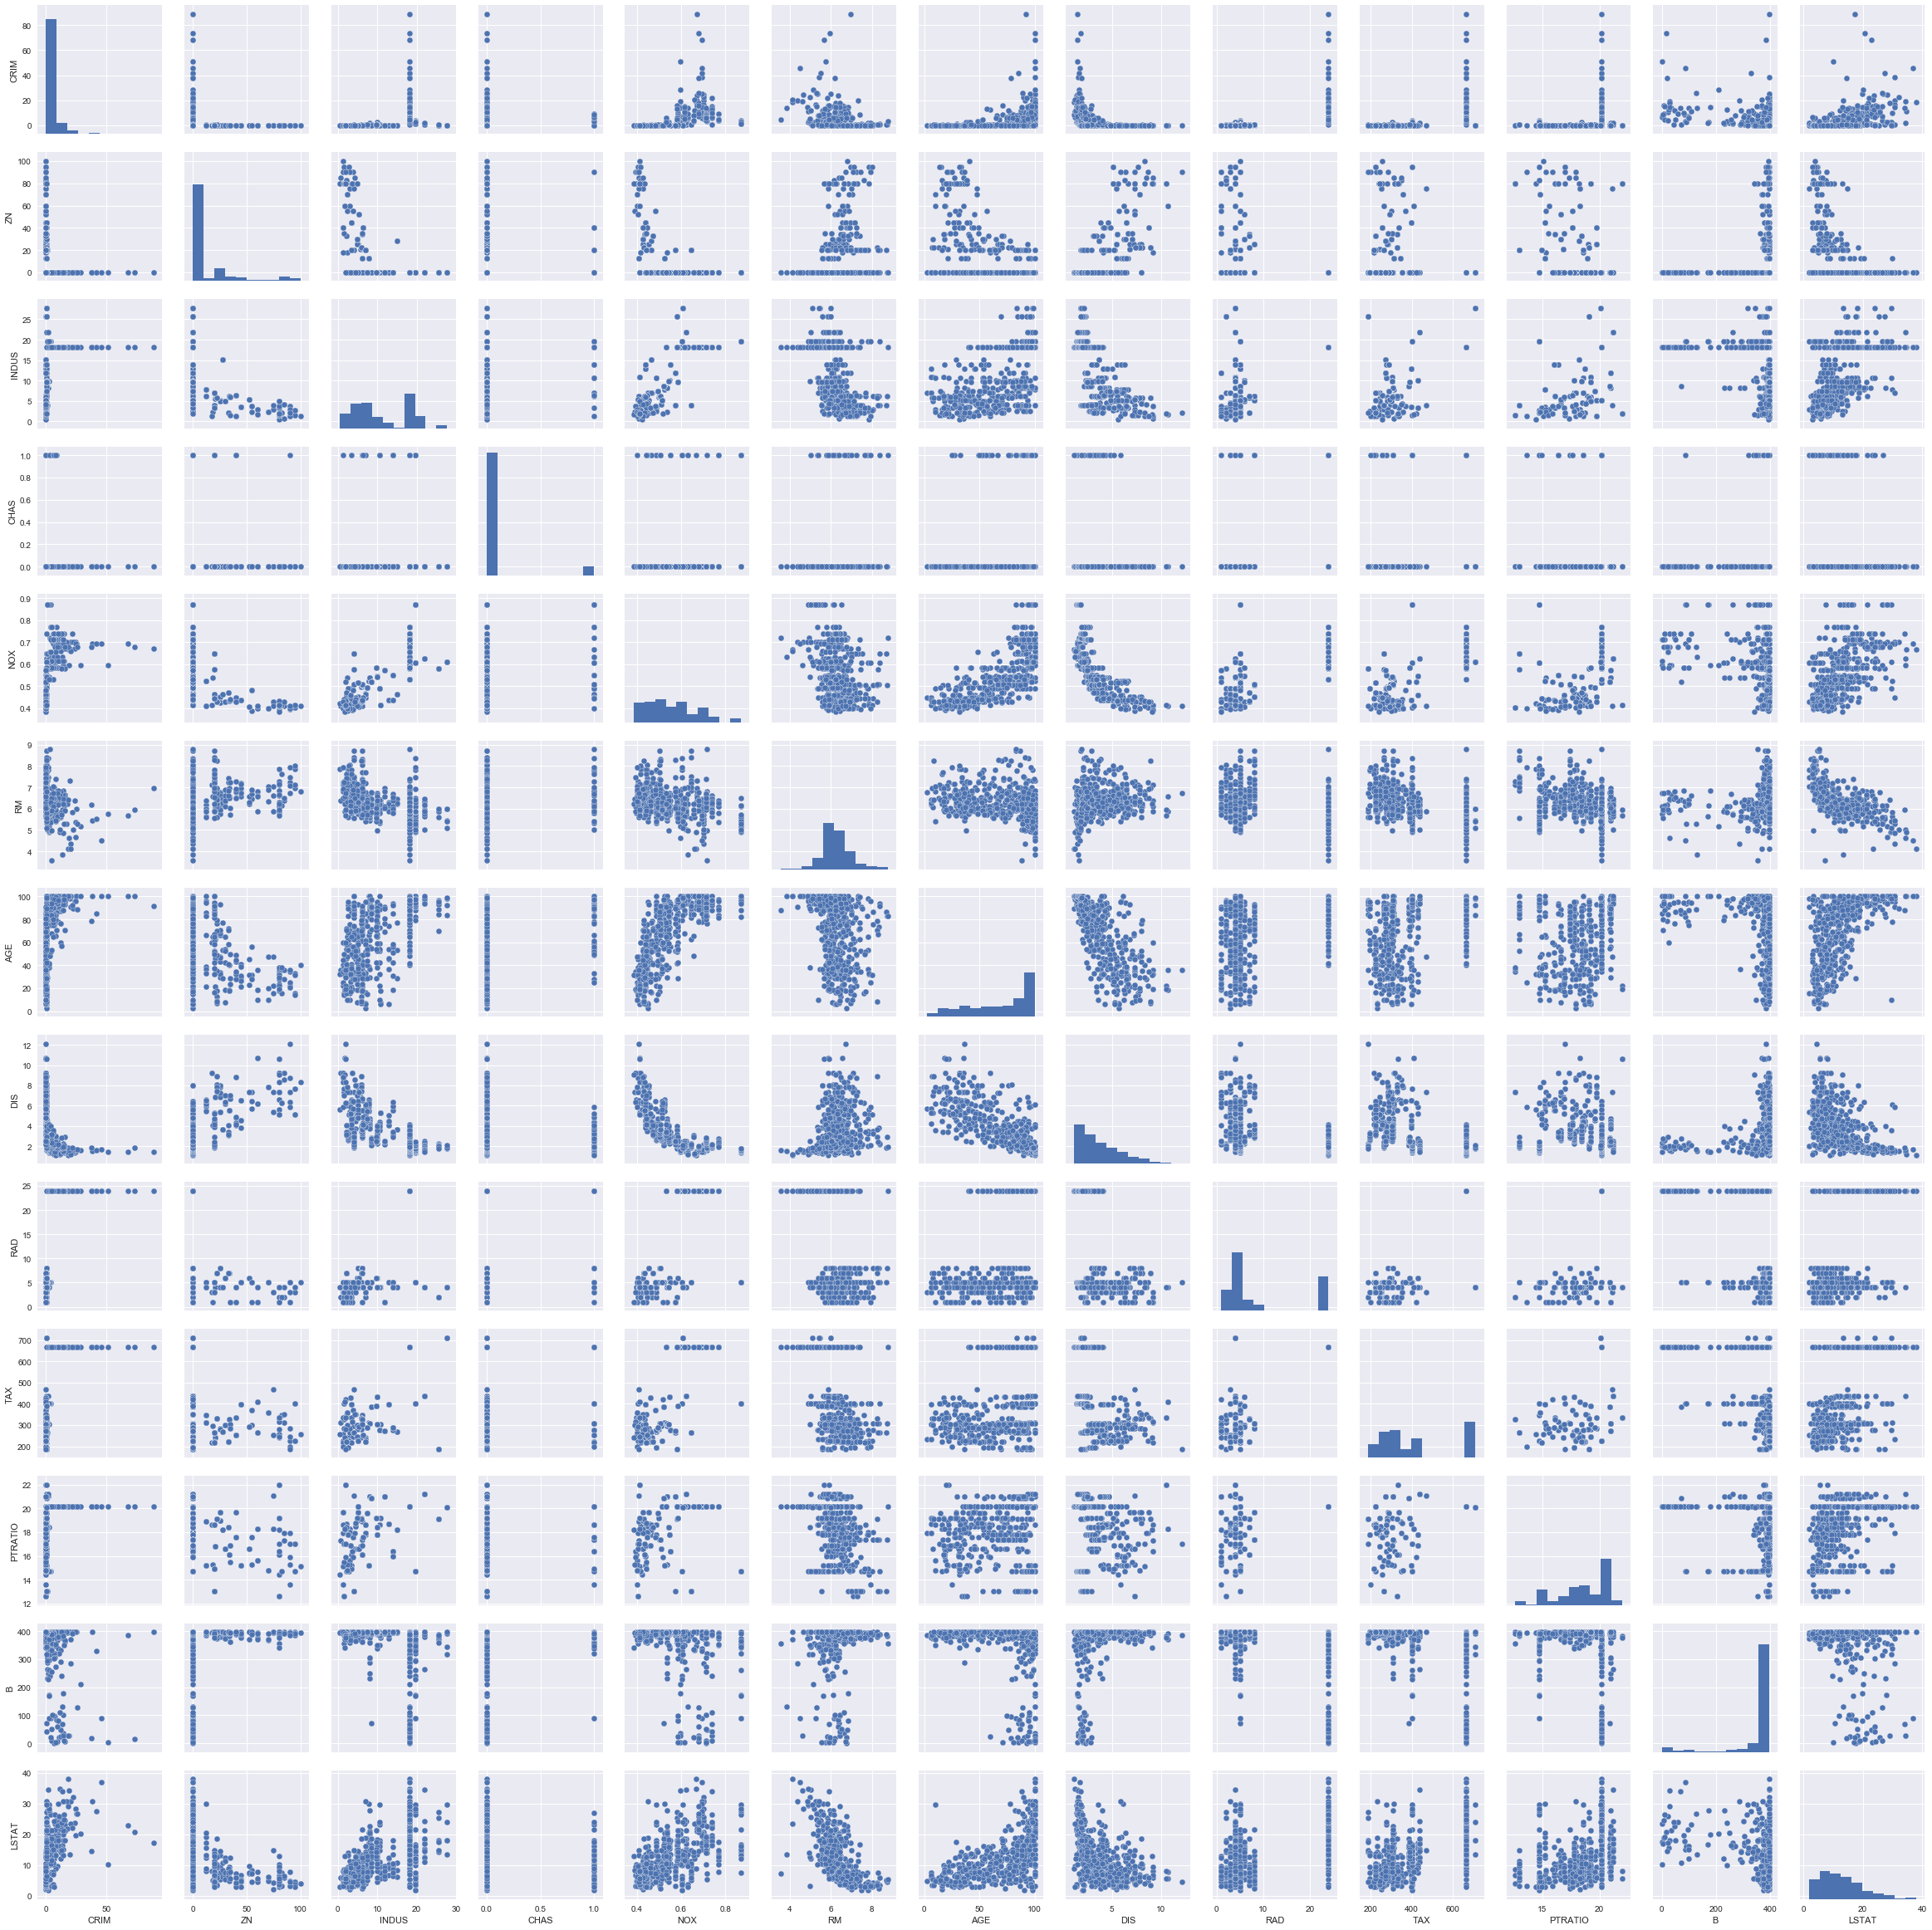

In [10]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


## Demo: Patsy

In [11]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [12]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [13]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.5043486813354807
